<a href="https://colab.research.google.com/github/jjininu/Data-Cortex-Nuclear/blob/main/Data_Cortex_Nuclear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy  as np

### import plotting libraries


import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)
from datetime import datetime

### import preprosesing , modeling and evaluating  libraries.
from sklearn.impute import KNNImputer
from sklearn import metrics
from scipy.stats import  shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from xgboost import XGBClassifier
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv(r"Data_Cortex_Nuclear.csv")

In [ ]:
df.head(2)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m


In [ ]:
df_target = df[['Genotype', 'Treatment', 'Behavior']]
df_target["Genotype"].unique(),df_target["Treatment"].unique(),df_target["Behavior"].unique()
df_target_dummy = pd.get_dummies(df_target,drop_first=True,columns=["Genotype","Treatment","Behavior"])
df_target_dummy.columns=["Genotype","Treatment","Behavior"] 
df_target_dummy

,Genotype,Treatment,Behavior
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
1075,1,1,1
1076,1,1,1
1077,1,1,1
1078,1,1,1


In [ ]:
df.isna().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [ ]:
df.fillna(df.mean(),inplace  =True)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [ ]:
df.drop("MouseID",axis = 1,inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


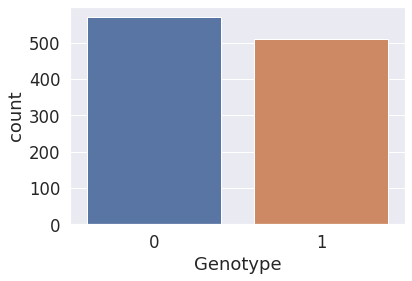

In [ ]:
sns.countplot(df_target_dummy["Genotype"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


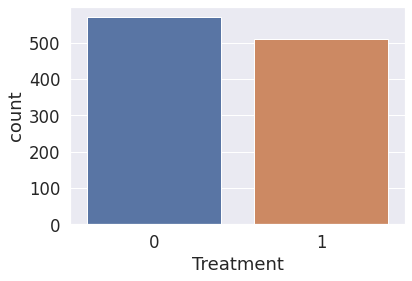

In [ ]:
sns.countplot(df_target_dummy["Treatment"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


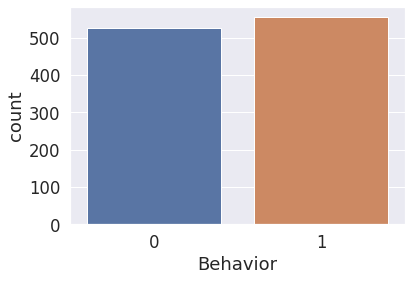

In [ ]:
sns.countplot(df_target_dummy['Behavior'])

###Feature Reduction:
Using RFE [Recursive feature engineering] to bucket out important 

In [ ]:
import warnings
from sklearn.feature_selection import RFE

In [ ]:
X = df.drop(['Genotype', 'Treatment', 'Behavior', 'class'],axis = 1)
y_Genotype = df_target_dummy["Genotype"]
y_Treatment = df_target_dummy["Treatment"]
y_Behavior = df_target_dummy['Behavior']


In [ ]:
X_train, X_test, y_train_g, y_test_g = train_test_split(X, y_Genotype, test_size=0.25, random_state=42,shuffle = True)
X_train, X_test, y_train_t, y_test_t = train_test_split(X, y_Treatment, test_size=0.25, random_state=42,shuffle = True)
X_train, X_test, y_train_b, y_test_b = train_test_split(X, y_Behavior, test_size=0.25, random_state=42,shuffle = True)

In [ ]:
rfe_g = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=40)
rfe_t = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=40)
rfe_b = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=40)
model = DecisionTreeClassifier()
pipeline_g = Pipeline(steps=[('s',rfe_g),('m',model)])
pipeline_t = Pipeline(steps=[('s',rfe_t),('m',model)])
pipeline_b = Pipeline(steps=[('s',rfe_b),('m',model)])
model_g = pipeline_g.fit(X_train, y_train_g)
model_t = pipeline_t.fit(X_train, y_train_t)
model_b = pipeline_b.fit(X_train, y_train_b)

In [ ]:
ref_df = pd.DataFrame({"Column_g":X_train.columns})
ref_df["selected"] =rfe_g.support_
ref_df["score_rfe"] = rfe_g.ranking_
ref_df_selected = ref_df.loc[ref_df["selected"]==True]
ref_df_selected.head(3)

,Column_g,selected,score_rfe
10,pERK_N,True,1
11,pJNK_N,True,1
12,PKCA_N,True,1


In [ ]:
ref_df_t =pd.DataFrame({"Column_t":X_train.columns})
ref_df_t["selected"] = rfe_t.support_
ref_df_selected_t = ref_df_t.loc[ref_df_t["selected"]==True]
ref_df_selected_t.head(3)

,Column_t,selected
3,NR1_N,True
4,NR2A_N,True
5,pAKT_N,True


In [ ]:
ref_df_b =pd.DataFrame({"Column_b":X_train.columns})
ref_df_b["selected"] = rfe_b.support_
ref_df_selected_b = ref_df_b.loc[ref_df_b["selected"]==True]
ref_df_selected_b.head(3)

,Column_b,selected
24,ERK_N,True
25,GSK3B_N,True
26,JNK_N,True


Find the common protiens for all three

In [ ]:
a = ref_df_selected["Column_g"]
b = ref_df_selected_t["Column_t"]
c = ref_df_selected_b["Column_b"]
set(a) & set(b) & set(c)

{'BAD_N',
 'BCL2_N',
 'GluR3_N',
 'IL1B_N',
 'MTOR_N',
 'TIAM1_N',
 'Ubiquitin_N',
 'nNOS_N',
 'pGSK3B_Tyr216_N',
 'pMTOR_N',
 'pNUMB_N'}

In [ ]:
X_new = df[['BCL2_N',
 'GFAP_N',
 'GluR3_N',
 'MTOR_N',
 'P3525_N',
 'Tau_N',
 'pMTOR_N',
 'pNUMB_N']]
X_train_new, X_test_new, y_train_g_new, y_test_g_new = train_test_split(X_new, y_Genotype, test_size=0.25, random_state=42,shuffle = True)
X_train_new, X_test_new, y_train_t_new, y_test_t_new = train_test_split(X_new, y_Treatment, test_size=0.25, random_state=42,shuffle = True)
X_train_new, X_test_new, y_train_b_new, y_test_b_new = train_test_split(X_new, y_Behavior, test_size=0.25, random_state=42,shuffle = True)

In [ ]:
rf = RandomForestClassifier()
m1 = rf.fit(X_train_new,y_train_g_new)
pred_g = m1.predict(X_test_new)
m2 = rf.fit(X_train_new,y_train_t_new)
pred_t = m2.predict(X_test_new)
m3 = rf.fit(X_train_new,y_train_b_new)
pred_b = m3.predict(X_test_new)
print(accuracy_score(y_test_g_new,pred_g))
print(accuracy_score(y_test_t_new,pred_t))
print(accuracy_score(y_test_b_new,pred_b))

0.9148148148148149
0.8666666666666667
0.9703703703703703


In [ ]:
df_new = df.drop(['Treatment','Behavior',"Genotype"],axis= 1)
X_c = df_new.iloc[:,:-1]
y_c = df_new.iloc[:,-1]
y_c.replace(['c-CS-m', 'c-SC-m', 'c-CS-s', 'c-SC-s', 't-CS-m', 't-SC-m',
       't-CS-s', 't-SC-s'],[1,2,3,4,5,6,7,8],inplace=True)



In [ ]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.25, random_state=42,shuffle = True)
y_c.unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
hyperparameter_Randomforest = {'max_depth':[None,4,6,8,10,12,15,20], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'max_features':['auto','sqrt','log2'],
                        'min_samples_split' :[2, 5, 10]}
hyperparameter_GradientBoost = {"n_estimators":[5,50,250,500],
                        "max_depth":[1,3,5,7,9],
                        "learning_rate":[0.01,0.1,1,10,100]}
hyperparameter_KNN = {'n_neighbors' : [4,5],
                      'weights' : ['uniform','distance'],
                      'metric' : ['minkowski','euclidean','manhattan'],
                      'leaf_size': [20,40,1],
                      'p': [1,2]}
hyperparameter_SVM= {'C': [0.1, 1, 10, 100, 1000],
                      'gamma': [1, 0.1, 1e-2, 1e-3, 1e-4, 1e-5],
                      'kernel': ['rbf','sigmoid']}
hyperparameter_xgb = {'n_estimators':[2,5,10,50],
                      'max_depth' : [1,3,10,20],
                      'learning_rate':[0.001,0.01,0.1,0.5],
                      'gamma':[1.0,0.9,0.5,0.1]
                     }


plt.figure(figsize=(20,20))
cv = StratifiedKFold(n_splits=5, random_state=666, shuffle=True)
def classification_models(estimator,param_grid):
  gsc = GridSearchCV(estimator = estimator ,param_grid = param_grid ,cv=5, n_jobs=1)
  model = gsc.fit(X_train_c,y_train_c)
  best_estimator = model.best_estimator_
  pred_train = best_estimator.predict(X_train_c)
  predict = best_estimator.predict(X_test_c)
  #auc = round(metrics.roc_auc_score(y_test_c,predict),2)
  #false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test_c,predict)

  print('{} \n Accuracy\n{}'.format (estimator,classification_report(y_test_c,predict)))
  print('==================================================================================')
  print('Accuracy score(test): {} \nAccuracy score(train): {}'.format (round(accuracy_score(y_test_c,predict),3),round(accuracy_score(y_train_c,pred_train),3)))
  print('==================================================================================')
  print('Confusion matrix \n{}'.format (pd.crosstab(y_test_c,predict)))
  print('==================================================================================')


<Figure size 1440x1440 with 0 Axes>

In [ ]:
classification_models(KNeighborsClassifier(),hyperparameter_KNN)
classification_models(RandomForestClassifier(),hyperparameter_Randomforest)
classification_models(GradientBoostingClassifier(),hyperparameter_GradientBoost)
classification_models(SVC(),hyperparameter_SVM)
classification_models(XGBClassifier(),hyperparameter_xgb)

KNeighborsClassifier() 
 Accuracy
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        34
           3       1.00      0.98      0.99        42
           4       1.00      1.00      1.00        37
           5       1.00      0.96      0.98        26
           6       1.00      1.00      1.00        30
           7       0.96      1.00      0.98        25
           8       0.97      1.00      0.99        36

    accuracy                           0.99       270
   macro avg       0.99      0.99      0.99       270
weighted avg       0.99      0.99      0.99       270

Accuracy score(test): 0.993 
Accuracy score(train): 1.0
Confusion matrix 
col_0   1   2   3   4   5   6   7   8
class                                
1      40   0   0   0   0   0   0   0
2       0  34   0   0   0   0   0   0
3       0   0  41   0   0   0   1   0
4       0   0   0  37   0   0   0   0
5       0   0

###Using K Best Technique to find important Variables

In [ ]:
classification_models(SVC(),hyperparameter_SVM)

SVC() 
 Accuracy
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00        26
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        36

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270

Accuracy score(test): 1.0 
Accuracy score(train): 1.0
Confusion matrix 
col_0   1   2   3   4   5   6   7   8
class                                
1      40   0   0   0   0   0   0   0
2       0  34   0   0   0   0   0   0
3       0   0  42   0   0   0   0   0
4       0   0   0  37   0   0   0   0
5       0   0   0   0  26   0   

In [ ]:
Using K Best Technique to find important Variables

SyntaxError: ignored

In [ ]:

X_new = SelectKBest(f_classif,k=25).fit(train_X, train_y )
# capturing the important variables
KBest_features=train_X.columns[X_new.get_support()]
KBest_features